## DSCI 508: MACHINE LEARNING
### Determining Trade Union Status Project 
#### Zakaria Alsahfi

This Project deals with implementation of different models and doing preprocessing withthe data in order to compare the results and performance of different models.  Weapplied statistical techniques to see which model is performing best. In this project we will create a binary classifier which will predict that either the data scientist will remaina USDU member or not.

In [1]:
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.core.display import HTML
%matplotlib inline

#### Reading data for preprocessing

In [2]:
df = pd.read_csv("Zakaria -TRAIN.csv", usecols = lambda column : column not in ["ID","LeftUnion"])
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147
1,Female,0,Yes,No,34,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100,3415
2,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,70
3,Male,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,71,71
4,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104,6383


In [3]:
dft = pd.read_csv("DSCI-508-Competition-Test_Data.csv", index_col=0)
dft.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
DS_ID,,,,,,,,,,,,,,,,,,,
10000,Male,0,Yes,No,1,No,Maryville,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30
10001,Female,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890
10002,Female,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108
10003,Female,0,No,No,45,No,Maryville,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841
10004,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152


In [4]:
target = pd.read_csv("Zakaria -TRAIN.csv", usecols=["LeftUnion"])
target.head()

,LeftUnion
0,No
1,No
2,No
3,Yes
4,Yes


### Train and Test Split
Doing Train and Test Split between data. It involves importing a function from scikit learn librarywhich can perform this task very easily. Now doing Train and Test Split between data. So that we will apply all the preprocessing on train data but not test data. Otherwise our model will get prone to data leakage and it will perform worse in production when newdata arrives.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42, shuffle = True)

In [6]:
# reseting the index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_set = dft.reset_index(drop=True)
X_train.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70,144
1,Female,0,No,No,16,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,54,834
2,Male,1,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,74,545
3,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147
4,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45,75


In [7]:
y_train.head()

,LeftUnion
0,No
1,Yes
2,Yes
3,No
4,Yes


In [8]:
def merge_data_label(df1, df2):
    data = pd.concat([df1, df2], axis = 1)
    return data

data = merge_data_label(X_train, y_train)
data_test = merge_data_label(X_test, y_test)

In [9]:
df = data
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70,144,No
1,Female,0,No,No,16,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,54,834,Yes
2,Male,1,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,74,545,Yes
3,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147,No
4,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45,75,Yes


In [10]:
data_test.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Male,0,Yes,No,53,Yes,No,Dial-in,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Two year,No,Credit card (automatic),20,1110,No
1,Male,1,No,No,52,No,Maryville,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49,2551,Yes
2,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78,78,Yes
3,Male,1,No,No,56,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101,5594,No
4,Female,0,No,No,3,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,54,140,No


### NaN values Check
Checking For Nan values in the dataset column wise. Because we have to remove the nan values before fitting out the ML model on data.For that purpose we are **creating a function named check_nan()** in which we are passing a dataframe as an argument. It gives us output telling the no of NaN values.

In [11]:
# check Nan values in the dataframe
def check_nan(df):
    return df.isna().sum(axis = 0)

In [12]:
print(str(check_nan(df))+'\n\n'+str(check_nan(data_test))+'\n\n'+str(check_nan(test_set)))

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

gender              0
Management          0
USAcitizen          0
Married             0
Mont

#### Counting unique values:
Here we are counting unique values for every column in the dataset. For that purpose we again **created a function named count_unique()** taking dataframe column name as an input.

In [13]:
# Checking dataset columns
def count_unique(df_col):
    return df_col.value_counts()
print(count_unique(df["USAcitizen"]))

Yes    338
No     331
Name: USAcitizen, dtype: int64


In [14]:
# Binary unique values
print(count_unique(df["Married"]))
print(count_unique(df["ContinuingEd"]))
print(count_unique(df["PaperlessBilling"]))

No     464
Yes    205
Name: Married, dtype: int64
Yes    602
No      67
Name: ContinuingEd, dtype: int64
Yes    379
No     290
Name: PaperlessBilling, dtype: int64


#### Encoding
Here we are also encoding our categorical values into binary format so that our machine learning model doesn’t generate any type of error while fitting on data.

In [15]:
# Transforming categorical data into numeric data
from sklearn.preprocessing import LabelEncoder

def encode(x):
    x = LabelEncoder().fit_transform(x)
    return x

df[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = df[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

data_test[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = data_test[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

test_set[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = test_set[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

In [16]:
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,1,0,1,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,0,Mailed check,70,144,No
1,0,0,0,0,16,1,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,1,Mailed check,54,834,Yes
2,1,1,0,0,7,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,0,Mailed check,74,545,Yes
3,1,0,0,0,26,1,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Electronic check,86,2147,No
4,1,0,0,0,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Mailed check,45,75,Yes


#### Plotting Histogram
Below we are using matplotlib for Plotting of Histogram. This is used for checking the frequency distribution of different values inside a column or feature. Each column is a different unique feature for our model. As we can see from the output there are 3 labels Yes, No and Maryville.We are plotting for FeatureA and FeatureB.

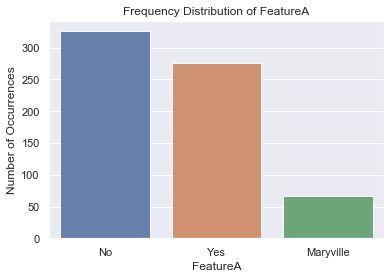

In [17]:
carrier_count = df['FeatureA'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of FeatureA')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FeatureA', fontsize=12)
plt.show()

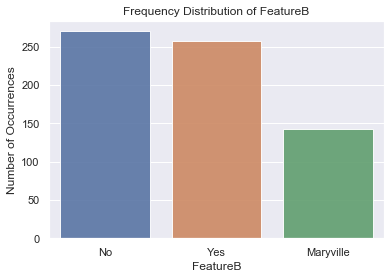

In [18]:
carrier_count = df['FeatureB'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of FeatureB')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FeatureB', fontsize=12)
plt.show()

In [19]:
# Non binary unique values
print(df["FeatureA"].value_counts())
print(df["FeatureB"].value_counts())
print(df["FeatureC"].value_counts())
print(df["FeatureD"].value_counts())
print(df["FeatureE"].value_counts())
print(df["FeatureF"].value_counts())
print(df["FeatureG"].value_counts())
print(df["Connectivity"].value_counts())
print(df["DuesFrequency"].value_counts())
print(df["PaymentMethod"].value_counts())

No           326
Yes          276
Maryville     67
Name: FeatureA, dtype: int64
No           270
Yes          257
Maryville    142
Name: FeatureB, dtype: int64
No           308
Yes          219
Maryville    142
Name: FeatureC, dtype: int64
No           290
Yes          237
Maryville    142
Name: FeatureD, dtype: int64
No           285
Yes          242
Maryville    142
Name: FeatureE, dtype: int64
No           336
Yes          191
Maryville    142
Name: FeatureF, dtype: int64
Yes          274
No           253
Maryville    142
Name: FeatureG, dtype: int64
Fiber optic    300
DSL            227
other           92
Dial-in         50
Name: Connectivity, dtype: int64
Month-to-month    355
Two year          160
One year          154
Name: DuesFrequency, dtype: int64
Electronic check             231
Mailed check                 157
Credit card (automatic)      145
Bank transfer (automatic)    136
Name: PaymentMethod, dtype: int64


#### One hot Encoding:
Doing One hot Encoding for those columns which are containing non binary values. One hot encoding simple converts the values between 0’s and 1’s e.g.  0000001 etc. We use one hotencoding in order to convert our categorical feature column into numeric columns so that modelcan easily do learning. For this purpose we **created a function named encode_nb()** which is taking 3 arguments. 1 is dataframe, 2nd is the column name and 3rd is the prefix that we wantin the name of every new column.


In [20]:
# One Hot Encoding non binary values
def encode_nb(x, col, pre = "feature"):
    x = pd.get_dummies(x, columns = [col], prefix=pre)
    return x

df3 = encode_nb(df, 'FeatureA', "A")
df3 = encode_nb(df3, 'FeatureB', "B")
df3 = encode_nb(df3, 'FeatureC', "C")
df3 = encode_nb(df3, 'FeatureD', "D")
df3 = encode_nb(df3, 'FeatureE', "E")
df3 = encode_nb(df3, 'FeatureF', "F")
df3 = encode_nb(df3, 'FeatureG', "G")
df3 = encode_nb(df3, 'Connectivity', "conn")
df3 = encode_nb(df3, 'DuesFrequency', "dues_F")
df3 = encode_nb(df3, 'PaymentMethod', "pay_M")

# For test data
df_test = encode_nb(data_test, 'FeatureA', "A")
df_test = encode_nb(df_test, 'FeatureB', "B")
df_test = encode_nb(df_test, 'FeatureC', "C")
df_test = encode_nb(df_test, 'FeatureD', "D")
df_test = encode_nb(df_test, 'FeatureE', "E")
df_test = encode_nb(df_test, 'FeatureF', "F")
df_test = encode_nb(df_test, 'FeatureG', "G")
df_test = encode_nb(df_test, 'Connectivity', "conn")
df_test = encode_nb(df_test, 'DuesFrequency', "dues_F")
df_test = encode_nb(df_test, 'PaymentMethod', "pay_M")

# For New test data
test_set = encode_nb(test_set, 'FeatureA', "A")
test_set = encode_nb(test_set, 'FeatureB', "B")
test_set = encode_nb(test_set, 'FeatureC', "C")
test_set = encode_nb(test_set, 'FeatureD', "D")
test_set = encode_nb(test_set, 'FeatureE', "E")
test_set = encode_nb(test_set, 'FeatureF', "F")
test_set = encode_nb(test_set, 'FeatureG', "G")
test_set = encode_nb(test_set, 'Connectivity', "conn")
test_set = encode_nb(test_set, 'DuesFrequency', "dues_F")
test_set = encode_nb(test_set, 'PaymentMethod', "pay_M")

In [21]:
df3.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,2,1,0,70,144,No,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,16,1,1,54,834,Yes,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,7,1,0,74,545,Yes,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,26,1,1,86,2147,No,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,45,75,Yes,...,0,0,0,1,0,0,0,0,0,1


In [22]:
df3.isna().sum(axis = 0)   # Nan values in every column
df_test.isna().sum(axis = 0)   # Nan values in every column
df.isna().sum(axis = 1)   # Nan values in every row.

0      0
1      0
2      0
3      0
4      0
      ..
664    0
665    0
666    0
667    0
668    0
Length: 669, dtype: int64

## Plotting and Visualization

#### Box and whisker plot:
Doing Box and whisker plot for Checking the availability of outliers in the code. The outliers are simply unwanted values in the code that can generate bias if not removed. We are using aseaborn library for plotting Box and whisker plot. Box and whisker plot. Below we are also checking no of unique values for **MonthlyDues** and **TotalDues** features.

**detecting outlier**

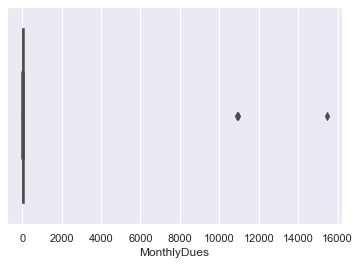

In [23]:
sns.boxplot(x=df3['MonthlyDues'])

**certainly there are outliers**

In [24]:
df3['MonthlyDues'].unique()

array([   70,    54,    74,    86,    45,    90,    25,    20,    75,
          94,    60,    79,   111,   100,    69,    85,    76,   104,
         103,    71,    46,    84,   114,    78,   110,   106,    89,
          95,    81,    97,    44,    55,    80,   115,    91,    50,
         109,   108,   112,    67,    56,    53,    24,    64,    99,
          77,    29,    31,   116,   101,    88,    72,    19,    83,
          36,    30,    92,    93,    41,   105,    82,    66,    49,
          26,    21,    58,    98,    51,    68,    96,    34,   113,
          73,   102, 10878,   107,    48,    40, 15453,    61,    65,
          87,    35,    18,    62, 10938,    57,   119,    42])

In [25]:
df3['TotalDues'].unique()

array(['144', '834', '545', '2147', '75', '145', '248', '25', '952',
       '1129', '1608', '3036', '171', '5565', '70', '7512', '5201', '69',
       '1350', '152', '3467', '4108', '20', '5538', '1975', '1993', '46',
       '5982', '7939', '2840', '68', '855', '1832', '7535', '3650',
       '4513', '2258', '7041', '4614', '3106', '400', '303', '5879',
       '143', '2684', '52', '2018', '573', '563', '2861', '5657', '457',
       '93', '4246', '2614', '4307', '605', '320', '271', '7334', '169',
       '311', '2920', '267', '6938', '470', '7931', '4915', '369', '7796',
       '832', '5000', '2387', '202', '1150', '1208', '1733', '863',
       '1391', '5648', '906', '6442', '3369', '1464', '2708', '2866',
       '8004', '1204', '302', '73', '3632', '196', '3777', '1759', '265',
       '227', '926', '7159', '8425', '4113', '220', '6521', '3173', '19',
       '5213', '1799', '831', '#VALUE!', '261', '2296', '2352', '244',
       '6414', '1169', '476', '7509', '1929', '4698', '1648', '1009'

**Converting TotalDues column in the traning and test set from strings to integers/float**

In [26]:
df3['TotalDues'] = pd.to_numeric(df3.TotalDues, errors="coerce")
df_test['TotalDues'] = pd.to_numeric(df_test.TotalDues, errors="coerce")
test_set['TotalDues'] = pd.to_numeric(test_set.TotalDues, errors="coerce")

In [27]:
print(str(df3['TotalDues'])+'\n\n'+str(df_test['TotalDues'])+'\n\n'+str(test_set['TotalDues']))

0       144.0
1       834.0
2       545.0
3      2147.0
4        75.0
        ...  
664     292.0
665    6585.0
666      74.0
667    1327.0
668     392.0
Name: TotalDues, Length: 669, dtype: float64

0      1110
1      2551
2        78
3      5594
4       140
       ... 
325    4495
326    4534
327     443
328      44
329    6474
Name: TotalDues, Length: 330, dtype: int64

0         30.0
1       1890.0
2        108.0
3       1841.0
4        152.0
         ...  
4995     553.0
4996    3496.0
4997      94.0
4998    7053.0
4999     302.0
Name: TotalDues, Length: 5000, dtype: float64


#### Check NaN for specific Columns:
Checking for those rows which contain the NaN values. NaN values are supposed to beremoved before fitting the model otherwise the code will throw an error. We will remove the outlier by providing a threshold value to our column so it will remove the outlier row. Below we are also printing the data frame row which is containing NaN value. Then we are taking mean of that specific column which is containing NaN value in order to fill the NaN value.

#### Checking nan for training set and test set

In [28]:
print('Number of nan value in training set:',df3["TotalDues"].isna().sum(axis = 0) )
print('Number of nan value in test set:', df_test["TotalDues"].isna().sum(axis = 0) )
print('Number of nan value in test set:', test_set["TotalDues"].isna().sum(axis = 0) )

Number of nan value in training set: 1
Number of nan value in test set: 0
Number of nan value in test set: 8


In [29]:
# Finding the row which contains Nan value
is_NaN = df3.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df3[row_has_NaN]
rows_with_NaN.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
112,1,0,1,1,0,1,0,20,NaN,No,...,1,0,0,0,0,1,0,0,0,1


#### Filling Nan values

In [30]:
df3['TotalDues'] = round(df3['TotalDues'].fillna((df3['TotalDues'].mean())),0)
test_set['TotalDues'] = round(test_set['TotalDues'].fillna((test_set['TotalDues'].mean())),0)
df_test['TotalDues'] = round(df_test['TotalDues'].fillna((df_test['TotalDues'].mean())),0)

#### Checking Nan values again

In [31]:
df3["TotalDues"].isna().sum(axis = 0) 

0

#### BOX PLOT:
Plotting Box plot for checking Outliers for other columns, As here we can see there is no outlier in our data. We have removed the outlier previously. We can also plot scatter plot for detecting outlier.

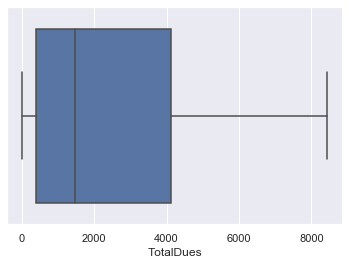

In [32]:
# As we can see there is no outlier in this data
sns.boxplot(x=df3['TotalDues'])

#### Scatter Plot:
Again checking for outliers, But now we are plotting scatter plot for this. Here we found 3 outliersin total dues. We again removed it by taking mean of the available values There are certainlyother ways too, but this works best for our problem.

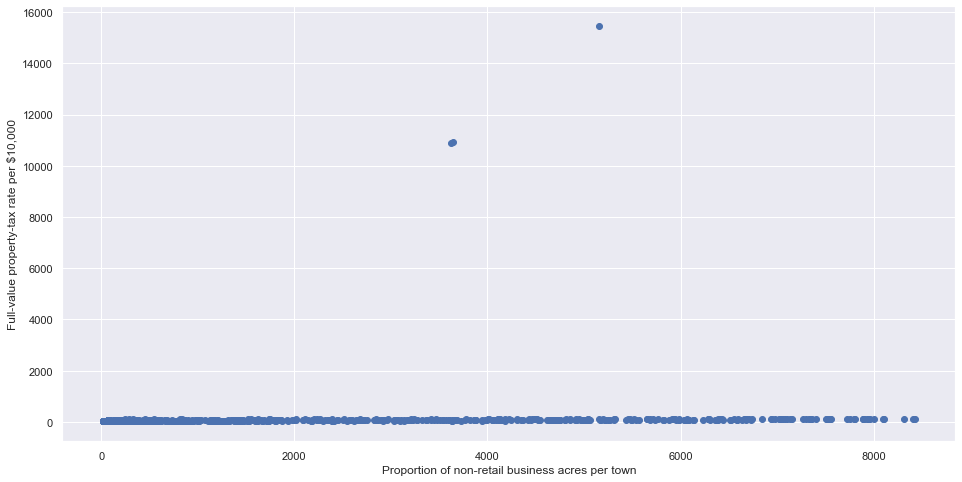

In [33]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3['TotalDues'], df3['MonthlyDues'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

#### Removing Outlier:
Here we are removing the outlier by simply providing the threshold value. The values above thatthreshold will be removed. And values below that threshold will be kept in our dataframe and later those values will be used as an input to our dataframe.

In [34]:
df2 = df3[df3['MonthlyDues'] < 1000]

In [35]:
df2.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,2,1,0,70,144.0,No,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,16,1,1,54,834.0,Yes,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,7,1,0,74,545.0,Yes,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,26,1,1,86,2147.0,No,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,45,75.0,Yes,...,0,0,0,1,0,0,0,0,0,1


#### Scatter and violin Plot:
We are again plotting scatter plots to confirm that our outliers has been removed and as we cansee our values are good now. Below we are plotting a Scatter and violin plot. The violin plot simply tells the density about how much distributed values we have in our data.

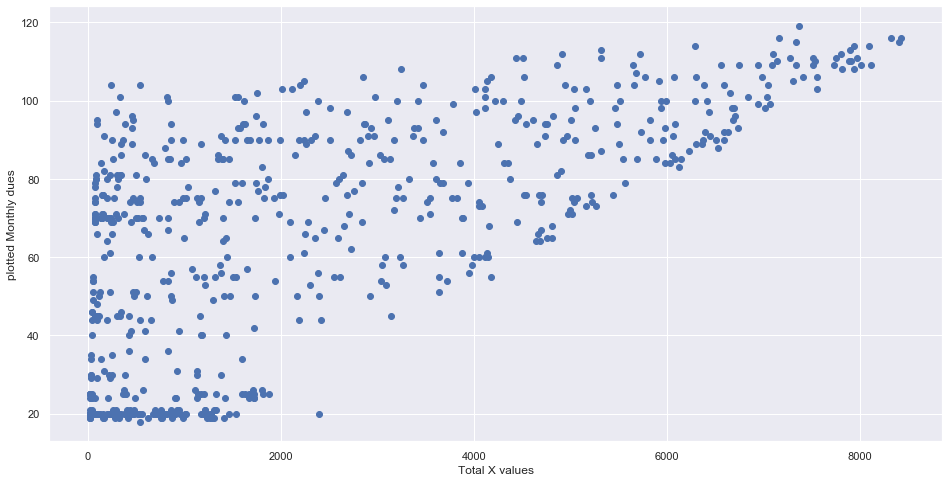

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df2['TotalDues'], df2['MonthlyDues'])
ax.set_xlabel('Total X values')
ax.set_ylabel('plotted Monthly dues')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a35c9a208>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a35c9a048>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a35c9a6d8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a35c9a940>}

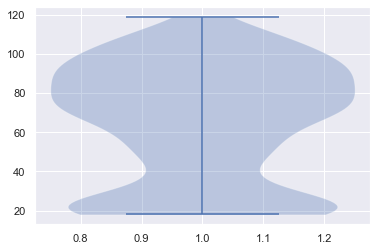

In [37]:
plt.violinplot(df2['MonthlyDues'])

#### Scree plot:
Below we are plotting the scree plot for **monthly dues** column to see how are distributed our values. It’s another way of visualization. We are using matplotlib library for scree plot.

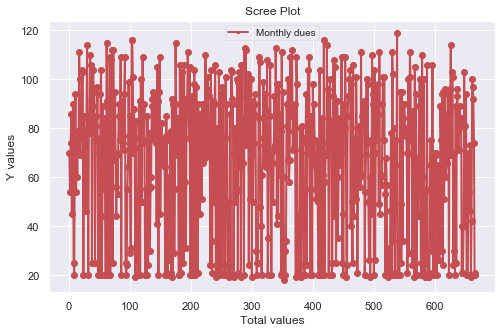

In [38]:
import matplotlib

mon_dues = df2['MonthlyDues']
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(df2['MonthlyDues'])) + 1
plt.plot(sing_vals, mon_dues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Total values')
plt.ylabel('Y values')
leg = plt.legend(['Monthly dues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

#### Bivariate plot:
Below we are plotting a Bivariate plot between monthly dues and Months in union to see the difference between both the column values.

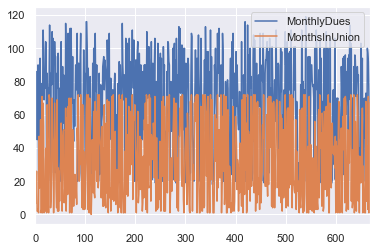

In [39]:
df4 = df2[['MonthlyDues', 'MonthsInUnion']]
df4.plot.line()

## Normalization
After plotting we are normalizing our columns. Normalization simply convert values between 0 and 1.

In [40]:
df_train_new = df2 

In [41]:
df_train_new_num = df_train_new[['MonthsInUnion','MonthlyDues','TotalDues']]
df_train_new_num.head()

,MonthsInUnion,MonthlyDues,TotalDues
0,2,70,144.0
1,16,54,834.0
2,7,74,545.0
3,26,86,2147.0
4,2,45,75.0


In [42]:
sc = StandardScaler()
df_train_new_num = sc.fit_transform(df_train_new_num)
(np.mean(df_train_new_num), np.std(df_train_new_num))

(7.1125398974985e-18, 1.0)

In [43]:
df_train_new_cat = df_train_new.drop(['MonthsInUnion','MonthlyDues','TotalDues'] , axis = 1)
df_train_new_cat.head()

,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,LeftUnion,A_Maryville,A_No,A_Yes,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,1,0,No,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,1,1,Yes,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,1,0,Yes,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,1,1,No,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,Yes,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [44]:
df_train_new_num = pd.DataFrame(df_train_new_num, columns = ['MonthsInUnion','MonthlyDues','TotalDues'])  
df_train_new_num.head()

,MonthsInUnion,MonthlyDues,TotalDues
0,-1.246752,0.151339,-0.960675
1,-0.681128,-0.376021,-0.664369
2,-1.044743,0.283179,-0.788474
3,-0.277110,0.678699,-0.100527
4,-1.246752,-0.672661,-0.990306


In [45]:
df_train_final = pd.concat([df_train_new_num, df_train_new_cat], axis = 1)
df_train_final.head()

,MonthsInUnion,MonthlyDues,TotalDues,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,-1.246752,0.151339,-0.960675,1.0,0.0,1.0,1.0,1.0,0.0,No,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.681128,-0.376021,-0.664369,0.0,0.0,0.0,0.0,1.0,1.0,Yes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.044743,0.283179,-0.788474,1.0,1.0,0.0,0.0,1.0,0.0,Yes,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.277110,0.678699,-0.100527,1.0,0.0,0.0,0.0,1.0,1.0,No,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.246752,-0.672661,-0.990306,1.0,0.0,0.0,0.0,1.0,0.0,Yes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df_test_new = test_set 

In [47]:
df_test_new_num = df_test_new[['MonthsInUnion','MonthlyDues','TotalDues']]
df_test_new_num.head()

,MonthsInUnion,MonthlyDues,TotalDues
0,1,30,30.0
1,34,57,1890.0
2,2,54,108.0
3,45,42,1841.0
4,2,71,152.0


In [48]:
df_test_new_num = sc.fit_transform(df_test_new_num)
(np.mean(df_test_new_num), np.std(df_test_new_num))

(6.963318810448982e-17, 1.0)

In [49]:
df_test_new_cat = df_test_new.drop(['MonthsInUnion','MonthlyDues','TotalDues'] , axis = 1)
df_test_new_cat.head()

,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,A_Maryville,A_No,A_Yes,B_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [50]:
df_test_new_num = pd.DataFrame(df_test_new_num, columns = ['MonthsInUnion','MonthlyDues','TotalDues'])  
df_test_new_num.head()

,MonthsInUnion,MonthlyDues,TotalDues
0,-1.268931,-1.154574,-0.990430
1,0.070734,-0.258882,-0.169917
2,-1.228335,-0.358403,-0.956021
3,0.517289,-0.756488,-0.191533
4,-1.228335,0.205551,-0.936611


In [51]:
df_test_final = pd.concat([df_test_new_num, df_test_new_cat], axis = 1)
df_test_final.head()

,MonthsInUnion,MonthlyDues,TotalDues,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,-1.268931,-1.154574,-0.990430,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0.070734,-0.258882,-0.169917,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.228335,-0.358403,-0.956021,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.517289,-0.756488,-0.191533,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,-1.228335,0.205551,-0.936611,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


### Perform a PCA
#### Train and Test Split:
Here we are separating train test data along with their labels. So that we can perform training. We are using the drop keyword in order to drop the label column from our dataframe. Same process goes with the train and test dataframe.

In [52]:
X_train = df_train_final.drop(['LeftUnion'], axis = 1)
y_train = df_train_final['LeftUnion']
componentsWanted = len(X_train.columns)
print(f'Components wanted = {componentsWanted}')
componentList = ['component'+ str(n) for n in range(componentsWanted)]

Components wanted = 41


In [53]:
X_train.isnull().sum()

MonthsInUnion                      3
MonthlyDues                        3
TotalDues                          3
gender                             3
Management                         3
USAcitizen                         3
Married                            3
ContinuingEd                       3
PaperlessBilling                   3
A_Maryville                        3
A_No                               3
A_Yes                              3
B_Maryville                        3
B_No                               3
B_Yes                              3
C_Maryville                        3
C_No                               3
C_Yes                              3
D_Maryville                        3
D_No                               3
D_Yes                              3
E_Maryville                        3
E_No                               3
E_Yes                              3
F_Maryville                        3
F_No                               3
F_Yes                              3
G

In [54]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [55]:
pca = PCA(n_components=6)
pca.fit(X_train)
x_pca = pca.transform(X_train)

In [56]:
pca = PCA(n_components=6)
principalComponents_train_data = pca.fit_transform(X_train)
print(principalComponents_train_data.shape)

(663, 6)


In [57]:
principalComponents_train_data_Df = pd.DataFrame(data = principalComponents_train_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5','p_c_6'])
principalComponents_train_data_Df.head()

,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5,p_c_6
0,-1.123156,-1.765350,-0.568427,-0.202989,-0.736615,-0.304088
1,-0.952456,-1.128504,0.248433,0.710367,-1.043984,-0.181601
2,-0.733406,-1.910995,-0.745070,-0.098707,-0.033341,-0.329689
3,0.376765,-1.248122,-1.049732,-0.300304,-0.040315,-0.259779
4,-1.725237,-1.782674,-0.129725,0.761185,-0.857132,0.426444


In [58]:
X_train.head()

,MonthsInUnion,MonthlyDues,TotalDues,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,-1.246752,0.151339,-0.960675,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.681128,-0.376021,-0.664369,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.044743,0.283179,-0.788474,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.277110,0.678699,-0.100527,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.246752,-0.672661,-0.990306,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
df_comp = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4', 'component 5']))
components = df_comp.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components.transpose()

,component 0,component 1,component 2,component 3,component 4,component 5
2,0.530784,0.251965,-0.227977,0.165887,-0.084599,0.033256
1,0.453539,-0.042664,-0.315131,-0.482817,-0.515765,-0.128799
0,0.430303,0.350500,-0.123795,0.531717,0.242857,0.114482
29,0.160671,-0.015790,0.131636,-0.228592,0.144420,0.285478
14,0.145454,-0.002293,0.195500,-0.222763,0.153149,0.215368
23,0.141642,0.035181,0.268401,-0.107032,0.086999,0.089575
32,0.133672,-0.151133,-0.152434,-0.185538,0.288628,-0.079900
20,0.118569,0.000999,0.199622,0.030107,-0.010979,-0.424902
11,0.112630,-0.011525,0.066390,-0.113220,0.349218,-0.252231
17,0.109808,0.029752,0.269191,0.014545,-0.160624,-0.012298


In [60]:
pca.explained_variance_ratio_

array([0.26047333, 0.16587216, 0.08584148, 0.06586519, 0.05341772,
       0.03435168])

In [61]:
X_train.iloc[:, [12, 15, 18, 21, 24, 27]].head()

,B_Maryville,C_Maryville,D_Maryville,E_Maryville,F_Maryville,G_Maryville
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_train_final = X_train.drop(['C_Maryville', 'D_Maryville', 'E_Maryville', 'F_Maryville', 'G_Maryville'], axis = 1)
X_train_final.head()

,MonthsInUnion,MonthlyDues,TotalDues,gender,Management,USAcitizen,Married,ContinuingEd,PaperlessBilling,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,-1.246752,0.151339,-0.960675,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.681128,-0.376021,-0.664369,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.044743,0.283179,-0.788474,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.277110,0.678699,-0.100527,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.246752,-0.672661,-0.990306,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
X_train = df2.drop(['LeftUnion'], axis=1)
table1 = X_train.head()   # Check
# For test set
X_test = df_test.drop(['LeftUnion'], axis=1)
table2 = X_test.head()  # Check
display(table1)
display(table2)

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,2,1,0,70,144.0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,16,1,1,54,834.0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,7,1,0,74,545.0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,26,1,1,86,2147.0,0,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,45,75.0,0,...,0,0,0,1,0,0,0,0,0,1


,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,0,53,1,0,20,1110,0,...,1,0,0,0,0,1,0,1,0,0
1,1,1,0,0,52,0,1,49,2551,1,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,1,0,78,78,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,0,56,1,1,101,5594,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,3,1,1,54,140,0,...,0,0,0,1,0,0,0,0,1,0


#### For training set
* Convert series to DataFrame.
* Encoding target values. Encoding target values into 1 and 0.

In [64]:
y_train = df2["LeftUnion"]
y_train = y_train.to_frame()
table1 = y_train.head()
y_train = y_train.astype(str).apply(encode)
table2 = y_train.head()
display(table1)
display(table2)

,LeftUnion
0,No
1,Yes
2,Yes
3,No
4,Yes


,LeftUnion
0,0
1,1
2,1
3,0
4,1


#### For testing set
* Convert series to df.
* Encoding target values. Encoding target values into 1 and 0.

In [65]:
y_test = df_test["LeftUnion"]
y_test = y_test.to_frame()
table1 = y_test.head()
y_test = y_test.apply(encode)
table2 = y_test.head()
display(table1)
display(table2)

,LeftUnion
0,No
1,Yes
2,Yes
3,No
4,No


,LeftUnion
0,0
1,1
2,1
3,0
4,0


# Fitting models

### *Regression model*
In this model we achieved fairly high accuracy.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [67]:
logisticRegr = LogisticRegression(solver='lbfgs',max_iter=1000)
logisticRegr.fit(X_train.values, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred = logisticRegr.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


#### Plot Confusion Matrix

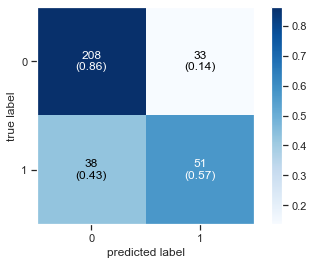

In [69]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Printing the Accuracy Score

In [70]:
print ('Accuracy Score :',np.round(accuracy_score(y_test, y_pred),2)) 

Accuracy Score : 0.78


#### Diplay Classification report as Data Frame

In [71]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.845528,0.863071,0.854209,241.000000
1,0.607143,0.573034,0.589595,89.000000
accuracy,0.784848,0.784848,0.784848,0.784848
macro avg,0.726336,0.718052,0.721902,330.000000
weighted avg,0.781237,0.784848,0.782844,330.000000


#### Testing with new dataset

In [72]:
pred = logisticRegr.predict(test_set[0:100])
print(pred)

[1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]


### *Decision tree model*

In [73]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]


#### Plot Confusion Matrix

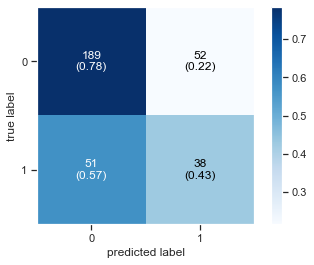

In [74]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Printing the Accuracy Score

In [75]:
print ('Accuracy Score :',np.round(accuracy_score(y_test, y_pred),2)) 

Accuracy Score : 0.69


#### Diplay Classification report as Data Frame

In [76]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.787500,0.784232,0.785863,241.000000
1,0.422222,0.426966,0.424581,89.000000
accuracy,0.687879,0.687879,0.687879,0.687879
macro avg,0.604861,0.605599,0.605222,330.000000
weighted avg,0.688986,0.687879,0.688426,330.000000


### *Support Vector Machine*
Now here we are running our support vector machine model and we got fairly good accuracy ontest set

In [77]:
clf = svm.SVC()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Plot Confusion Matrix

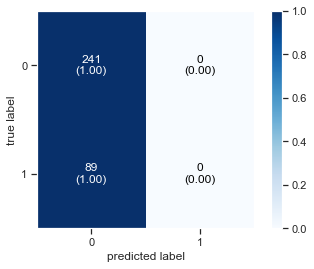

In [78]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Printing the Accuracy Score 

In [79]:
print ('Accuracy Score :',np.round(accuracy_score(y_test, y_pred),2))

Accuracy Score : 0.73


#### Diplay Classification report as Data Frame

In [80]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.730303,1.000000,0.844133,241.000000
1,0.000000,0.000000,0.000000,89.000000
accuracy,0.730303,0.730303,0.730303,0.730303
macro avg,0.365152,0.500000,0.422067,330.000000
weighted avg,0.533343,0.730303,0.616473,330.000000


### *Random Forest*
Time to play with a random forest model. It’s an ensemble technique which utilized multiple trees in order to learn best features and perform well on test set. It’s a very famous machine learning model.

In [81]:
clf = RandomForestClassifier(max_depth=5, n_estimators= 100 , random_state=25)
clf = clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


#### Plot Confusion Matrix

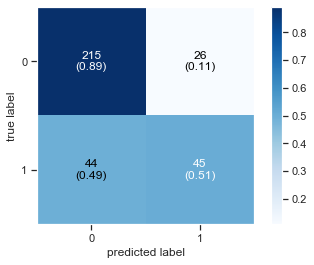

In [82]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Printing the Accuracy Score 

In [83]:
#printing the results 
print ('Accuracy Score :',np.round(accuracy_score(y_test, y_pred),2)) 

Accuracy Score : 0.79


#### Diplay Classification report as Data Frame

In [84]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.830116,0.892116,0.860000,241.000000
1,0.633803,0.505618,0.562500,89.000000
accuracy,0.787879,0.787879,0.787879,0.787879
macro avg,0.731959,0.698867,0.711250,330.000000
weighted avg,0.777171,0.787879,0.779765,330.000000


### *Neural Network*
Now we trained a neural network to see how well our model is performing on a simple DNNnetwork.

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=41, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                504       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the keras model

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
666/666 [==============================] - 0s 362us/sample - loss: 8.2351 - acc: 0.7402
Epoch 2/150
666/666 [==============================] - 0s 152us/sample - loss: 0.7725 - acc: 0.6877
Epoch 3/150
666/666 [==============================] - 0s 146us/sample - loss: 0.5178 - acc: 0.7387
Epoch 4/150
666/666 [==============================] - 0s 148us/sample - loss: 0.5769 - acc: 0.7462
Epoch 5/150
666/666 [==============================] - 0s 163us/sample - loss: 0.6633 - acc: 0.7342
Epoch 6/150
666/666 [==============================] - 0s 148us/sample - loss: 0.5178 - acc: 0.7553
Epoch 7/150
666/666 [==============================] - 0s 149us/sample - loss: 0.5436 - acc: 0.7598
Epoch 8/150
666/666 [==============================] - 0s 149us/sample - loss: 0.5062 - acc: 0.7838
Epoch 9/150
666/666 [==============================] - 0s 145us/sample - loss: 0.5271 - acc: 0.7853
Epoch 

666/666 [==============================] - 0s 141us/sample - loss: 0.4303 - acc: 0.8138
Epoch 79/150
666/666 [==============================] - 0s 140us/sample - loss: 0.4320 - acc: 0.8138
Epoch 80/150
666/666 [==============================] - 0s 137us/sample - loss: 0.4277 - acc: 0.8258
Epoch 81/150
666/666 [==============================] - 0s 139us/sample - loss: 0.3979 - acc: 0.8288
Epoch 82/150
666/666 [==============================] - 0s 141us/sample - loss: 0.4183 - acc: 0.8303
Epoch 83/150
666/666 [==============================] - 0s 149us/sample - loss: 0.4195 - acc: 0.8108
Epoch 84/150
666/666 [==============================] - 0s 149us/sample - loss: 0.4228 - acc: 0.8243
Epoch 85/150
666/666 [==============================] - 0s 146us/sample - loss: 0.4082 - acc: 0.8288
Epoch 86/150
666/666 [==============================] - 0s 154us/sample - loss: 0.4287 - acc: 0.8108
Epoch 87/150
666/666 [==============================] - 0s 138us/sample - loss: 0.4302 - acc: 0.8213
Epo

#### Evaluate the keras model

In [87]:
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))

666/666 [==============================] - 0s 71us/sample - loss: 0.3759 - acc: 0.8453
Training Accuracy: 84.53
330/330 [==============================] - 0s 30us/sample - loss: 0.4749 - acc: 0.7515
Testing Accuracy: 75.15


In [88]:
y_pred = model.predict_classes(X_test)
print(y_pred.ravel())

[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0]


#### Plot Confusion Matrix

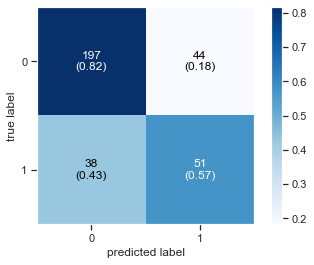

In [89]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Printing the Accuracy Score

In [90]:
print ('Accuracy Score :',np.round(accuracy_score(y_test, y_pred),2))

Accuracy Score : 0.75


#### Diplay Classification report as Data Frame

In [91]:
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.838298,0.817427,0.827731,241.000000
1,0.536842,0.573034,0.554348,89.000000
accuracy,0.751515,0.751515,0.751515,0.751515
macro avg,0.687570,0.695231,0.691039,330.000000
weighted avg,0.756996,0.751515,0.754000,330.000000


# Q / A

**Q1 :** Comparing your results, to that of a blind guess, explain why you think the results differed?

**ANS :** In the blind guesses the model is not trained on any kind of data. you just give arandom predictionThere is no statistical calculation involved behind the ans. therefore the results differafter training the model. Because before training the model hasn’t leant anything fromthe data. But after training model has learnt the weights and now can perform better onlearned data.

**Q2 :** Describe how you would improve your project if you had more time?

**ANS :** I would apply some advance statistical technique for removing outliers andassigning more weights to the minority classes. Also I would like to do fine tuning byusing pre-trained deep learning model. I would apply more data cleaning techniques toclean out some redundant values.